<a href="https://colab.research.google.com/github/RizqRihaz13/MachineLearningTasks/blob/main/Week5_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Unggah Dataset ke Google Colab**




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Memuat Dataset**



In [10]:
import pandas as pd

# Mengganti path dengan lokasi file di Google Drive
df = pd.read_csv('/content/drive/MyDrive/Dataset/diabetes_dataset.csv')

# Menampilkan beberapa baris pertama data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**3. Melihat Informasi Dataset**

In [23]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Insight :**


**DataFrame berisi data tentang 768 individu. Setiap individu memiliki 9 atribut, seperti jumlah kehamilan, kadar glukosa, tekanan darah, dan sebagainya.**

In [24]:
# Menampilkan deskriptif statistik data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Insight :**

**Dari output df.describe(), kita dapat memperoleh informasi penting tentang distribusi data pada setiap kolom**

**4. Menyiapkan Data untuk Model**

In [14]:
# Misalkan 'Outcome' adalah kolom target
X = df.drop('Outcome', axis=1)  # Semua kolom kecuali 'Outcome'
y = df['Outcome']  # Kolom target

**5. Membagi Data menjadi Train dan Test Set**

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**6. Membangun dan Melatih Model Decision Tree**

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

**Insight :**

**Kita telah membuat sebuah model DecisionTreeClassifier dengan parameter max_depth=5 dan random_state=42**

**7. Evaluasi Model**

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediksi pada data test
y_pred = model.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7922077922077922
Confusion Matrix:
 [[87 12]
 [20 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



**Insight :**

**Model yang telah dilatih memiliki kinerja yang cukup baik, dengan akurasi sekitar 79%. Namun, kita juga dapat melihat bahwa model lebih baik dalam memprediksi kelas 0 dibandingkan kelas 1, berdasarkan nilai precision dan recall untuk masing-masing kelas.**

**8. Visualisasi Decision Tree**

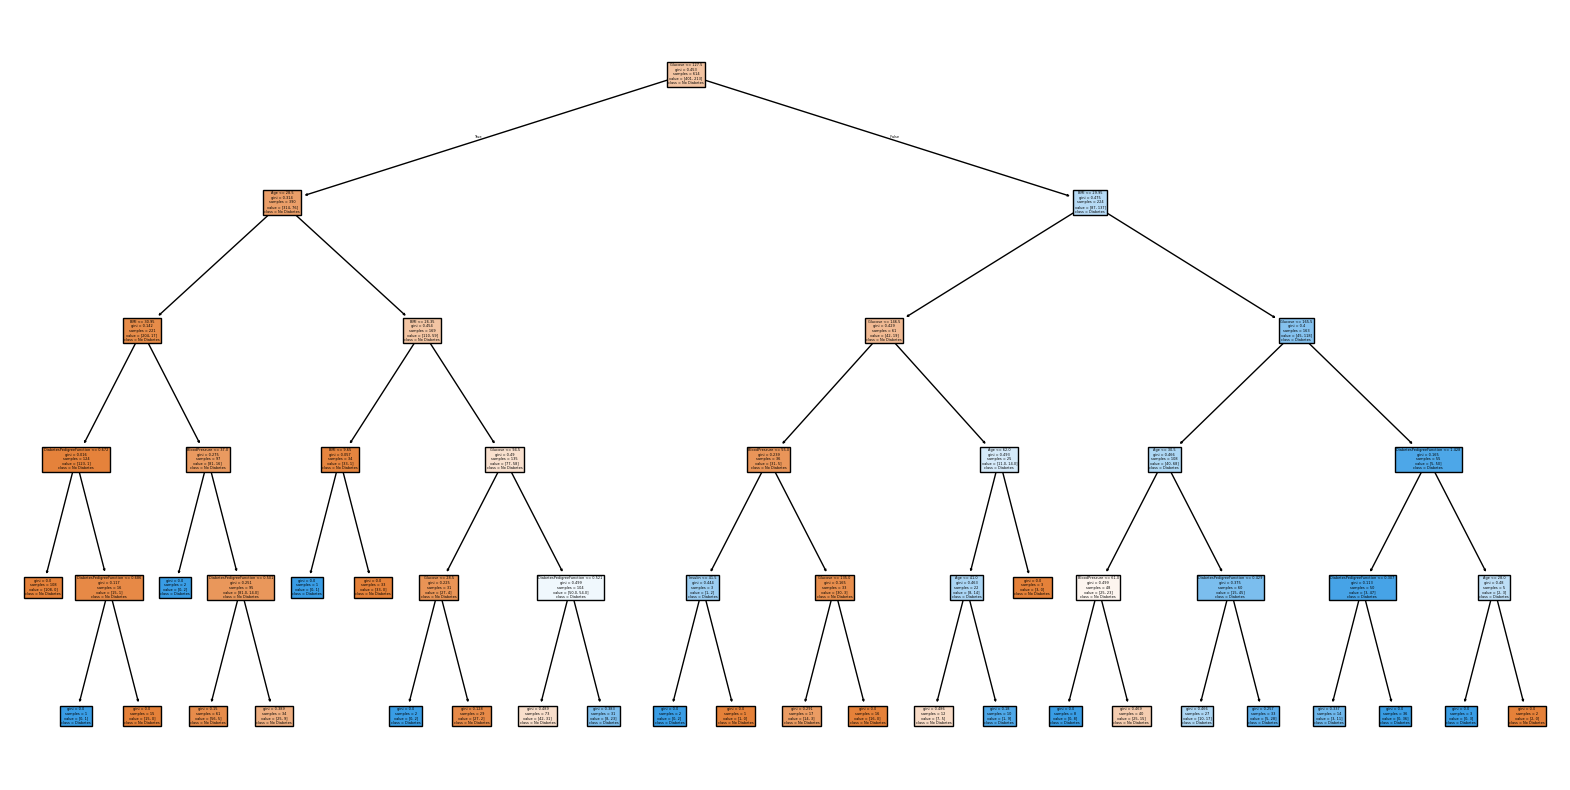

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

**Insight :**

**Visualisasi pohon keputusan membantu kita memahami bagaimana model bekerja. Kita dapat melihat fitur mana yang paling penting dalam membuat keputusan, serta urutan pengambilan keputusan. Misalnya, jika fitur "Glucose" berada di dekat akar pohon, itu berarti fitur ini sangat penting dalam menentukan kelas.**

**9. Hyperparameter Tuning**

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3, 'min_samples_split': 2}


**Insight :**

**Hasil di atas menunjukkan bahwa kombinasi hyperparameter terbaik yang ditemukan adalah max_depth=3 dan min_samples_split=2. Artinya, pohon keputusan dengan kedalaman maksimum 3 dan setiap node dibagi menjadi dua cabang ketika setidaknya ada 2 sampel pada node tersebut memberikan kinerja terbaik berdasarkan metrik evaluasi yang digunakan oleh GridSearchCV.**